<a href="https://colab.research.google.com/github/jazzminegarg/Quantum-Computing/blob/main/Assignments/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit==0.43.2

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.7 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.43.2-py3-none-any.whl size=7754 sha256=4cfc63ac572b399d7d12a511aa751ecb3432e22c128d45ec7dc9aa5f7259823d
  Sto

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [2]:
import numpy as np

Quantum Coin Game Results:
{'0': 512, '1': 488}

Classical Coin Toss Results:
{'0': 498, '1': 502}


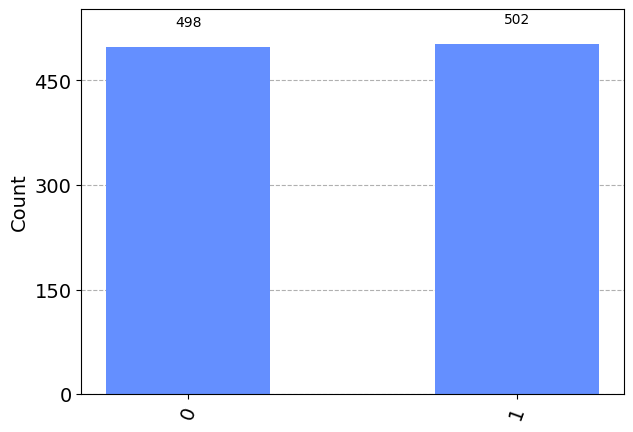

In [3]:
qc_quantum = QuantumCircuit(1, 1)  # Create a quantum circuit with 1 qubit and 1 classical bit
qc_quantum.h(0)  # Apply Hadamard gate to create superposition
qc_quantum.measure(0, 0)  # Measure the qubit

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc_quantum, simulator, shots=1000)  # Execute the circuit 1000 times
result = job.result()
counts = result.get_counts(qc_quantum)

# Display the results
print("Quantum Coin Game Results:")
print(counts)  # To see the output, run the code.
plot_histogram(counts)  # To see the output, run the code.

# Classical Coin Toss Game (for comparison)
import random
classical_results = {'0': 0, '1': 0}
for _ in range(1000):
    result = random.randint(0, 1)
    classical_results[str(result)] += 1

print("\nClassical Coin Toss Results:")
print(classical_results)  # To see the output, run the code.
plot_histogram(classical_results)  # To see the output, run the code.

SECTION - 2


Estimated Pi: 3.213306255423447


<ipython-input-6-d33d25ddfcbc>:26: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


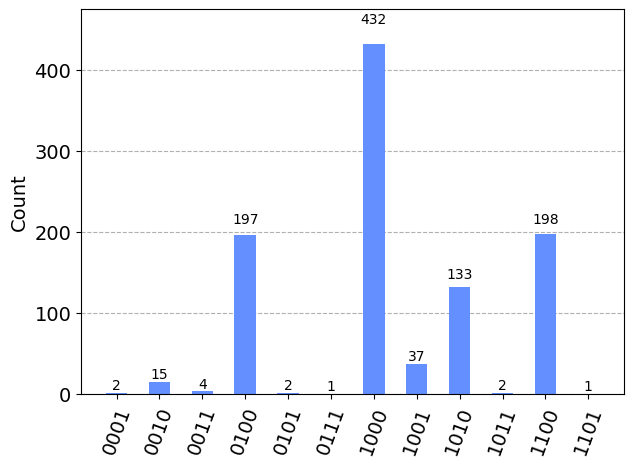

In [6]:
from qiskit.circuit.library import QFT
from qiskit import transpile,assemble
# Function to estimate pi
def qpe_pi(n_counting_qubits, n_shots):
    # Create the QuantumCircuit
    qc = QuantumCircuit(n_counting_qubits + 1, n_counting_qubits)

    # Initialize counting qubits to superposition
    qc.h(range(n_counting_qubits))

    # Apply controlled-U gate
    qc.x(n_counting_qubits)  # Apply X to the target qubit
    for i in range(n_counting_qubits):
        qc.cp(np.pi / 2 ** i, i, n_counting_qubits)  # Controlled-U gate

    # Apply Inverse Quantum Fourier Transform
    qc.append(QFT(n_counting_qubits, inverse=True), range(n_counting_qubits))

    # Measure the counting qubits
    qc.measure(range(n_counting_qubits), range(n_counting_qubits))

    # Execute the circuit
    simulator = Aer.get_backend('qasm_simulator')
    t_qc = transpile(qc, simulator)
    qobj = assemble(t_qc, shots=n_shots)
    job = simulator.run(qobj)
    result = job.result()
    counts = result.get_counts()

    # Estimate pi
    estimated_pi = 0
    for key, value in counts.items():
        decimal_value = int(key, 2) / (2 ** n_counting_qubits)
        estimated_pi += decimal_value * value

    estimated_pi /= n_shots
    estimated_pi = estimated_pi * 2 * np.pi  # Since we used U = T, we need to multiply by 2*pi

    return estimated_pi, counts

# Example usage
n_counting_qubits = 4
n_shots = 1024
estimated_pi, counts = qpe_pi(n_counting_qubits, n_shots)

print("Estimated Pi:", estimated_pi)  # To see the output, run the code.
plot_histogram(counts)  # To see the output, run the code.

SECTION - 3


In [7]:
# Function to implement the Deutsch-Jozsa algorithm
def deutsch_jozsa(oracle_type):
    # Create a quantum circuit with 2 qubits and 1 classical bit
    qc = QuantumCircuit(2, 1)

    # Initialize qubits
    qc.x(1)  # Apply X gate to the second qubit
    qc.h(0)  # Apply Hadamard gate to the first qubit
    qc.h(1)  # Apply Hadamard gate to the second qubit

    # Apply the oracle
    if oracle_type == 'constant':
        # Constant oracle: Does nothing
        pass
    elif oracle_type == 'balanced':
        # Balanced oracle: Applies CNOT gate
        qc.cx(0, 1)

    # Apply Hadamard gate to the first qubit
    qc.h(0)

    # Measure the first qubit
    qc.measure(0, 0)

    # Execute the circuit
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)

    return counts

# Example usage
constant_results = deutsch_jozsa('constant')
balanced_results = deutsch_jozsa('balanced')

print("Constant Oracle Results:", constant_results)  # To see the output, run the code.
print("Balanced Oracle Results:", balanced_results)  # To see the output, run the code.

Constant Oracle Results: {'0': 1024}
Balanced Oracle Results: {'1': 1024}
